## Classifier

# Background
Transcription factors are proteins that bind DNA at promoters to drive gene expression. Most preferentially bind to specific sequences while ignoring others. Traditional methods to determine these sequences (called motifs) have assumed that binding sites in the genome are all independent. However, in some cases people have identified motifs where positional interdependencies exist.

# Task
Implement a multi-layer fully connected neural network using your NeuralNetwork class to predict whether a short DNA sequence is a binding site for the yeast transcription factor Rap1. The training data is incredibly imbalanced, with way fewer positive sequences than negative sequences, so you will implement a sampling scheme to ensure that class imbalance does not affect training. As in step 2, all of the following work should be done in a Jupyter Notebook.

In [1]:
# Import all the necessary libraries
import os
import sys
sys.path.append(os.path.abspath(".."))
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

from nn.nn import NeuralNetwork
from nn.preprocess import sample_seqs, one_hot_encode_seqs
# Import the read_text_file and read_fasta_file functions from the nn.io module
from nn.io import read_text_file, read_fasta_file

# To-Do
- Use the read_text_file function from io.py to read in the 137 positive Rap1 motif examples.
- Use the read_fasta_file function from io.py to read in all the negative examples. Note that these sequences are much longer than the positive sequences, so you will need to process them to the same length.
- Balance your classes using your sample_seq function and explain why you chose the sampling scheme you did.
- One-hot encode the data using your one_hot_encode_seqs function.
- Split the data into training and validation sets.
- Generate an instance of your NeuralNetwork class with an appropriate architecture.
- Train your neural network on the training data.
- Plot your training and validation loss by epoch.
- Report the accuracy of your classifier on your validation dataset.
- Explain your choice of loss function and hyperparameters.

# 1. Read inRap1 motif examples & the negative examples

In [7]:
# Read the motif samples
positive_seqs = read_text_file('data/rap1-lieb-positives.txt')
# Read the fasta files
negative_seqs = read_fasta_file('data/yeast-upstream-1k-negative.fa')
# Balance classes using sample_seq function from io.py
seq_length = len(positive_seqs[0])
negative_seqs = [seq[:seq_length] for seq in negative_seqs]  # Truncate negative sequences

# 2. Balance your classes & One-hot encode the data

# Explain why you chose the sampling scheme you did
Since we have limited positive seqs and much more nagative one, this balancing scheme is designed to preserve all positive samples while randomly downsampling negative samples in proportion to the imbalance ratio. Also, because the Rap1 motif sequence of interest, this scheme will preserve as much as information from the motif while process the yeast upsteam sequence 

In [ ]:
# Balance classes
X, y = sample_seqs(positive_seqs + negative_seqs, [1] * len(positive_seqs) + [0] * len(negative_seqs))
X_encoded = one_hot_encode_seqs(X)


# 3. Split the data

In [ ]:
# Split into training and validation sets
train_size = int(0.8 * len(X))
X_train, X_val = X_encoded[:train_size], X_encoded[train_size:]
y_train = np.array(y[:train_size]).reshape(-1, 1)
y_val = np.array(y[train_size:]).reshape(-1, 1)

# 4. Generate a NeuralNetwork architecture

In [17]:
# Define neural network architecture
nn_arch = [
    {"input_dim": 68, "output_dim": 128, "activation": "relu"},
    {"input_dim": 128, "output_dim": 68, "activation": "relu"},
    {"input_dim": 68, "output_dim": 1, "activation": "sigmoid"}
]

# 5. Train your neural network on the training data

In [22]:
# Initialize and train neural network
nn = NeuralNetwork(nn_arch=nn_arch, lr=0.05, seed=42, batch_size=4, epochs=1000, loss_function='binary_cross_entropy')
train_loss, val_loss = nn.fit(X_train, y_train, X_val, y_val)


Epoch: 0, Train Loss: 0.6230404232697213, Val Loss: 0.885779623661141
Epoch: 1, Train Loss: 0.6060864703798626, Val Loss: 0.8879681377393269
Epoch: 2, Train Loss: 0.5897404911846956, Val Loss: 0.8835888286015233
Epoch: 3, Train Loss: 0.5781072918483886, Val Loss: 0.7872202895875043
Epoch: 4, Train Loss: 0.5609549970902606, Val Loss: 0.8212842805717214
Epoch: 5, Train Loss: 0.5480520368225228, Val Loss: 0.8489733610313217
Epoch: 6, Train Loss: 0.5362686097141218, Val Loss: 0.8085317606540291
Epoch: 7, Train Loss: 0.524958388688975, Val Loss: 0.7823915169944322
Epoch: 8, Train Loss: 0.5137959536211301, Val Loss: 0.7697152313273379
Epoch: 9, Train Loss: 0.5030790016792267, Val Loss: 0.7683399828686132
Epoch: 10, Train Loss: 0.49190724884676845, Val Loss: 0.7392368748465257
Epoch: 11, Train Loss: 0.4809194593968208, Val Loss: 0.727702192436278
Epoch: 12, Train Loss: 0.47005232627850413, Val Loss: 0.7085774523831021
Epoch: 13, Train Loss: 0.4593245857791281, Val Loss: 0.6583405010520618
Epo

# 6. Plot your training and validation loss by epoch

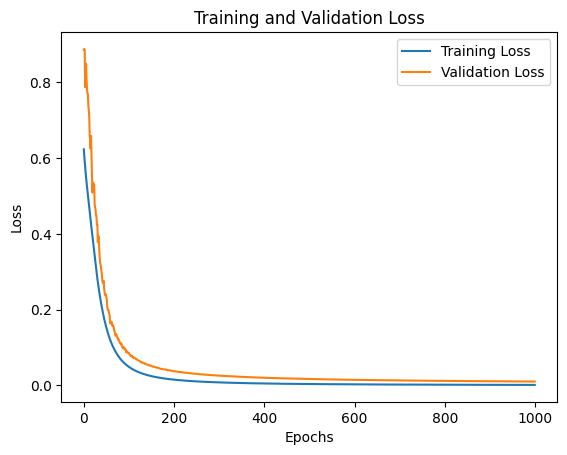

In [23]:
# Plot loss
plt.plot(train_loss, label="Training Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


# 7. Report the accuracy of your classifier on your validation dataset.

In [24]:
# Evaluate accuracy
y_pred = nn.predict(X_val) > 0.5
accuracy = np.mean(y_pred == y_val)
print(f"Validation Accuracy: {accuracy:.4f}")

Validation Accuracy: 1.0000


# 8. Explain your choice of loss function and hyperparameters.

I chose these hyperparameter values based on a balance between training stability and efficiency:

- lr=0.05 (Learning Rate): I wanted the model to learn at a decent pace without overshooting. A lower value (e.g., 0.001) would make training too slow, while a higher value (e.g., 0.1) might make it unstable.
- seed=42: Just to keep results reproducible. Classic choice.
- batch_size=4: a small batch size helps capture more detailed patterns. I tried 68, 16, and 32. Larger batch sizes not working well. 
- epochs=1000: Autoencoders sometimes take a while to converge, so I wanted to give it enough time to optimize properly.
- loss_function='binary_cross_entropy': Since we're dealing with classification problem, binary_cross_entropy makes sense as it works best for binary data.